Downloading the dataset

In [1]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0




  0%|          | 0.00/17.3M [00:00<?, ?B/s]
  6%|5         | 1.00M/17.3M [00:02<00:40, 417kB/s]
 12%|#1        | 2.00M/17.3M [00:06<00:55, 290kB/s]
 17%|#7        | 3.00M/17.3M [00:10<00:50, 294kB/s]
 23%|##3       | 4.00M/17.3M [00:13<00:45, 309kB/s]
 29%|##8       | 5.00M/17.3M [00:16<00:40, 320kB/s]
 35%|###4      | 6.00M/17.3M [00:21<00:43, 274kB/s]
 40%|####      | 7.00M/17.3M [00:25<00:39, 270kB/s]
 46%|####6     | 8.00M/17.3M [00:29<00:36, 265kB/s]
 52%|#####2    | 9.00M/17.3M [00:32<00:29, 299kB/s]
 58%|#####7    | 10.0M/17.3M [00:34<00:23, 327kB/s]
 64%|######3   | 11.0M/17.3M [00:37<00:18, 354kB/s]
 69%|######9   | 12.0M/17.3M [00:38<00:13, 412kB/s]
 75%|#######5  | 13.0M/17.3M [00:40<00:09, 458kB/s]
 81%|########  | 14.0M/17.3M [00:42<00:07, 475kB/s]
 87%|########6 | 15.0M/17.3M [00:46<00:06, 395kB/s]
 93%|#########2| 16.0M/17.3M [00:51<00:04, 291kB/s]
 98%|#########8| 17.0M/17.3M [00:56<00:01, 277kB/s]
100%|##########| 17.3M/17.3M [00:56<00:00, 287kB/s]
100%|##########| 17

In [2]:
from zipfile import ZipFile

with ZipFile("skin-disease-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [3]:
import os
train_dir  =r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  1049


In [4]:
test_dir = r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  259


Seeing some sample images

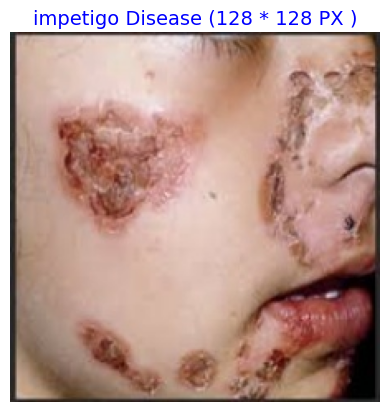

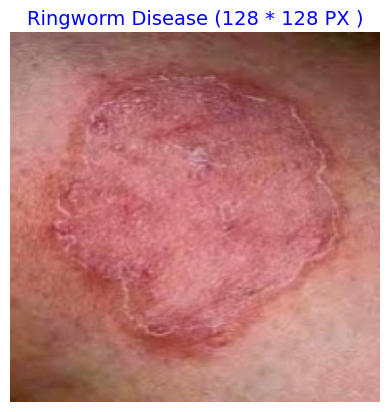

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
img_dir = r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\train_set\BA-impetigo\6_BA-impetigo (19).jpg"

# Read the image
img = mpimg.imread(img_dir)

# Display the image with a title
plt.imshow(img)
plt.axis("off")  # Turn off axis
plt.title("impetigo Disease (128 * 128 PX )", fontsize=14, color="blue")  # Add a title above the image
plt.show()



print(end =" ")


img_dir = r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\train_set\FU-ringworm\7_FU-ringworm (16).jpg"

# Read the image
img = mpimg.imread(img_dir)

# Display the image with a title
plt.imshow(img)
plt.axis("off")  # Turn off axis
plt.title("Ringworm Disease (128 * 128 PX )", fontsize=14, color="blue")  # Add a title above the image
plt.show()



In [6]:
print(img.shape)

(223, 223, 3)


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

Using Data Generators  - Helping in Data Augmentation

In [11]:
#DEFINING THE DATA GENERATOR
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [14]:
#Defining the training set data generator

train_dir  =r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\train_set"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 1048 images belonging to 9 classes.


In [19]:
#Defining the test set generator

test_dir = r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\test_set"

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)



Found 258 images belonging to 9 classes.


In [20]:
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

Classes: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles', 'unknown']


Building the CNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


NameError: name 'class_names' is not defined

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

Model Compiling

In [38]:
EPOCHS = 15

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_skin_model_with_unknown.h5", monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/15
33/33 [==============================] - 30s 861ms/step - loss: 2.1797 - accuracy: 0.1603 - val_loss: 1.9762 - val_accuracy: 0.2093
Epoch 2/15
33/33 [==============================] - 28s 855ms/step - loss: 2.0037 - accuracy: 0.2519 - val_loss: 1.7908 - val_accuracy: 0.4767
Epoch 3/15
33/33 [==============================] - 28s 842ms/step - loss: 1.8137 - accuracy: 0.3597 - val_loss: 1.6189 - val_accuracy: 0.4186
Epoch 4/15
33/33 [==============================] - 28s 839ms/step - loss: 1.6041 - accuracy: 0.4380 - val_loss: 1.3347 - val_accuracy: 0.5349
Epoch 5/15
33/33 [==============================] - 28s 842ms/step - loss: 1.4862 - accuracy: 0.4447 - val_loss: 1.3328 - val_accuracy: 0.5426
Epoch 6/15
33/33 [==============================] - 28s 842ms/step - loss: 1.3827 - accuracy: 0.5239 - val_loss: 1.0868 - val_accuracy: 0.6163
Epoch 7/15
33/33 [==============================] - 28s 842ms/step - loss: 1.2190 - accuracy: 0.5735 - val_loss: 1.1539 - val_accuracy: 0.5775

Model Training

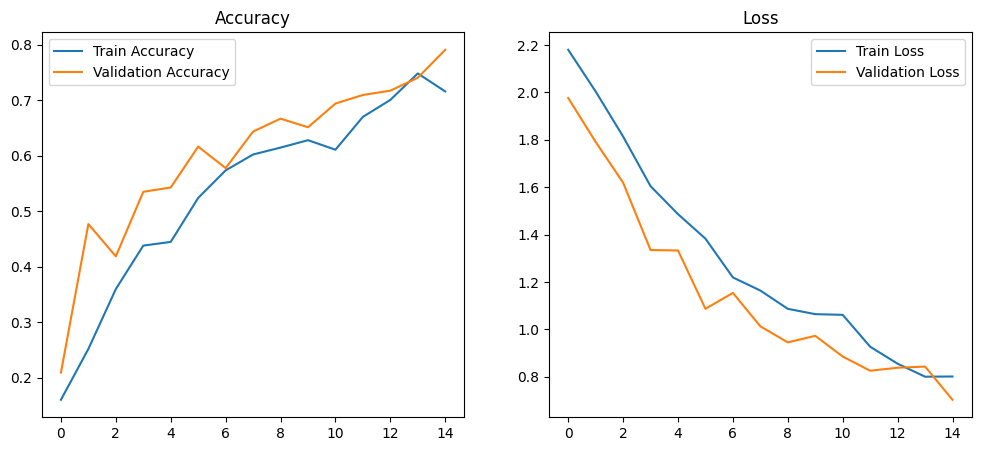

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


9/9 [==============================] - 2s 216ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.80      0.85      0.82        33
               BA-impetigo       0.59      0.50      0.54        20
           FU-athlete-foot       0.76      0.91      0.83        32
            FU-nail-fungus       0.82      0.70      0.75        33
               FU-ringworm       0.79      0.65      0.71        23
PA-cutaneous-larva-migrans       0.71      0.60      0.65        25
             VI-chickenpox       0.83      1.00      0.91        34
               VI-shingles       0.81      0.76      0.78        33
                   unknown       0.89      1.00      0.94        25

                  accuracy                           0.79       258
                 macro avg       0.78      0.77      0.77       258
              weighted avg       0.79      0.79      0.78       258



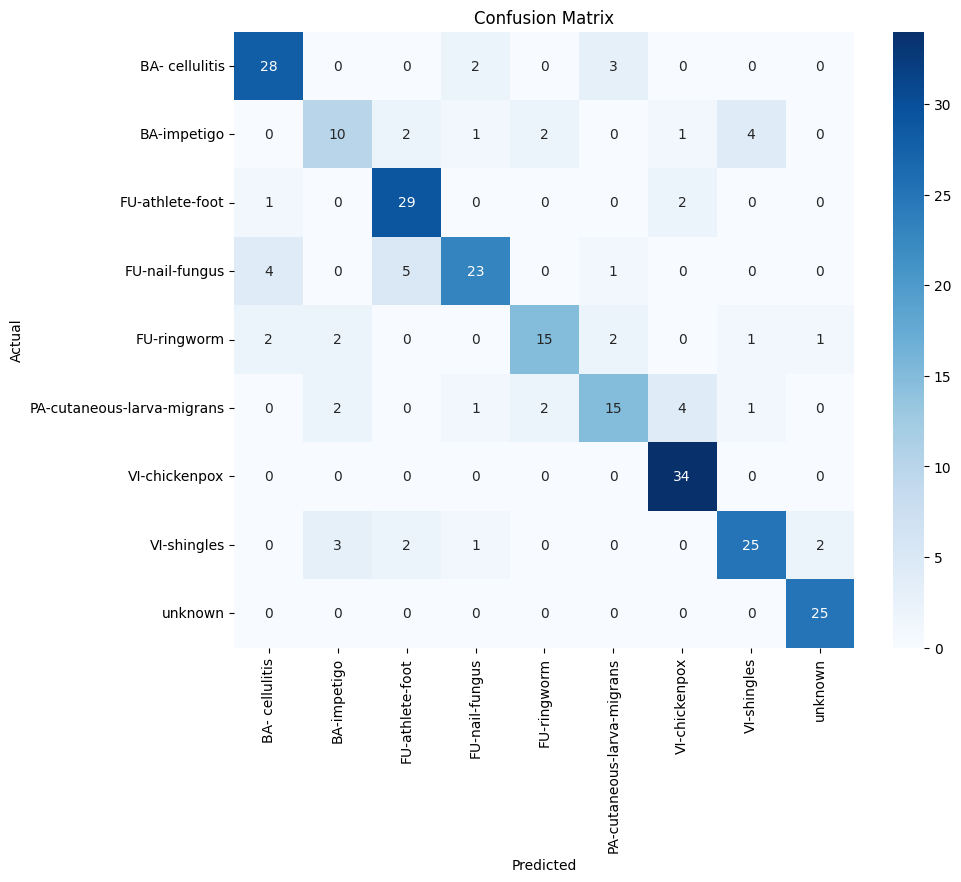

In [40]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
model.save("skin_disease_model_with_unknown.h5")


In [42]:
import os
from PIL import Image

# Original image folder
input_folder = r"C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\test_set\unknown"

# New folder to save resized images
output_folder = os.path.join(input_folder, "resized")
os.makedirs(output_folder, exist_ok=True)

# Resize up to 25 images
target_size = (150, 150)
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for i, filename in enumerate(image_files[:25]):
    img_path = os.path.join(input_folder, filename)
    img = Image.open(img_path).convert("RGB")
    resized_img = img.resize(target_size)
    resized_img.save(os.path.join(output_folder, filename))

print("✅ Resized first 25 images to 150x150 and saved in:", output_folder)


✅ Resized first 25 images to 150x150 and saved in: C:\Users\abhilash\OneDrive\Desktop\Project2 - Copy - Copy\skin-disease-datasaet\test_set\unknown\resized
